In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
def ref_func_sin_advection( x, t ):
    return u0 + amp*np.sin( k*(x-v*t) )
def ref_func_sin_diffusion( x, t ):
    return u0 + amp*np.sin(k*x)*np.exp(-k**2*D*t)

## Problem 1

### Second Order Accuracy of Lax-Wendroff Scheme
$\quad$ The Lax-Wendroff scheme updates the field on site $j$ (in unit of $\Delta_x$) at time $i+1$ (in unit of $\Delta_t$) using $$u_{j}^{i+1}=u_j^i-v\frac{\Delta t}{\Delta_x}(u_{j+\frac{1}{2}}^{i+\frac{1}{2}}-u_{j-\frac{1}{2}}^{i+\frac{1}{2}}),$$ where $$u_{j\pm\frac{1}{2}}^{i+\frac{1}{2}}=\frac{1}{2}(u^{i}_{j\pm1}+u^i_j)\mp\frac{v\Delta t}{2\Delta x}(u^i_{j\pm1}-u^i_j).$$\$\quad$From the above equation we can immediately obtain $$u_{j}^{i+1}=u_j^i-v\frac{\Delta t}{2\Delta_x}(u_{j+1}^i-u_{j-1}^i)+\frac{v^2\Delta t^2}{2\Delta x^2}(u_{j+1}^i+u_{j-1}^i-2u_j^i)$$
which can be further coverted to:

$$u^{i+1}_{j}=u_j^i-v\Delta t(\frac{\partial u}{\partial x}\rvert_{i,j}+O({\Delta x^2})+\dots)+\frac{v^2\Delta t^2}{2}(\frac{\partial^2u}{\partial x^2}+O({\Delta x^2})+\dots)\rvert_{i,j}.$$<br>
where some odd $\Delta x$ terms are eliminated by central difference.

$\quad$Since the differential equation we are solving is: $\frac{\partial u}{\partial t}=-v\frac{\partial u}{\partial x}$, and further use $\Delta x = \frac{\left|v\right|\Delta t}{r}$, we can re-write the above equation as: $$u^{i+1}_{j}=u_j^i+\Delta t\frac{\partial u}{\partial t}\rvert_{i,j}+\frac{\Delta t^2}{2}(\frac{\partial^2u}{\partial t^2})\rvert_{i,j}+O({\Delta t^3})+\dots,$$ 

which only different from the Taylor expansion of $u^{i+1}_j=u^{i}_j\rvert_{i,j}+\Delta t\frac{\partial u}{\partial t}\rvert_{i,j}+\frac{\Delta t^2}{2}(\frac{\partial^2u}{\partial t^2})\rvert_{i,j}+O(\Delta t^3)$

only different from the Taylor expansion by $$u^{i+1}_j=u^{i}_j\rvert_{i,j}+\Delta t\frac{\partial u}{\partial t}\rvert_{i,j}+\frac{\Delta t^2}{2}(\frac{\partial^2u}{\partial t^2})\rvert_{i,j}+O(\Delta t^3)$$ <br>by error of $\Delta t^3$. Thus, after integration of $N_{step}\propto\Delta t^{-1}$, the error becomes order of two for both $\Delta t$ and $\Delta x$, since we keep $r\equiv\frac{v\Delta t}{\Delta x}$ constant.

### The error and phase of Lax Wendroff scheme with respect to analytic solution show that this is truely correct to $2^{nd}$ order.
![title](./Lax_Wendroff_Error_of_Integration_and_Phase.png)

### Stability of Lax-Wendroff Scheme

$\quad$From the recursion relation $$u_{j}^{i+1}=u_j^i-v\frac{\Delta t}{2\Delta_x}(u_{j+1}^i-u_{j-1}^i)+\frac{v^2\Delta t^2}{2\Delta x^2}(u_{j+1}^i+u_{j-1}^i-2u_j^i)$$
<br>between $u^{i+1}_j$ and $u^{i}_j$, the ratio $\left|{\frac{u_j^{i+1}}{u_j^{i}}}\right|$ and phase shift with resepct to the analytic solution can be obtained by letting $r\equiv\left|\frac{v\Delta_t}{\Delta_x}\right|$ and $u^i_{j\pm1}=e^{\pm ik\Delta_x}$. Since:
$$\frac{u^{i+1}_{j}}{u^{i}_{j}}=(1-r^2(1-cos(k\Delta x))-irsin(k\Delta x)),$$
The ratio should be: $$\left|{\frac{u_j^{i+1}}{u_j^{1}}}\right|=\sqrt{1-2r^2(1-cos(k\Delta_x))+r^4(1-cos(k\Delta_x))^2+r^2(1-cos^2(k\Delta_x))}=\sqrt{1-r^2(1-cos(k\Delta_x))^2+r^4(1-cos(k\Delta_x))^2}=\sqrt{1-r^2(1-r^2)(1-cos(k\Delta x))^2}$$ and the phase shift per time step is :$$\Delta \phi = -tan^{-1}(\frac{rsin(k\Delta x)}{1-r^2(1-cos(k\Delta x))})+kv\Delta t\quad \textrm{for} \quad v>0$$
$$\Delta \phi = tan^{-1}(\frac{rsin(k\Delta x)}{1-r^2(1-cos(k\Delta x))})+kv\Delta t\quad \textrm{for} \quad v<0.$$

$\quad$To satisfy stability, $\left|{\frac{u_j^{i+1}}{u_j^{i}}}\right|$ cannot be greater than 1, i.e. $$r^2(1-r^2)(1-cos(k\Delta_x))^2\geq 0\Rightarrow r^2(1-r^2)=-(r^2-\frac{1}{2})^2+\frac{1}{4}\geq 0\Rightarrow 0\leq r^2\leq 1.$$<br>
Hence, one should take $0\leq r\leq 1$ (so $v\Delta t\leq \Delta x$) in order to have converging solution for any $t$.

### We can try differet $r$ to show the conditional stability.

Total calculation time is 1.10 s.
Time is 5.0000 period; error is 0.03160895 .
Total calculation time is 0.66 s.
Time is 5.0000 period; error is 0.03010025 .
Total calculation time is 0.27 s.
Time is 5.0000 period; error is 0.02407401 .
Total calculation time is 0.15 s.
Time is 5.0000 period; error is 0.00000000 .
Total calculation time is 0.07 s.
Time is 5.0000 period; error is 15405658885182184964420811300289426978271940100262149727252298096045831255218580079325612201342332366752956144318152704.00000000 .
Total calculation time is 0.03 s.
Time is 5.0000 period; error is 2038437460375164156463932419381926041760721662867707538020372308751634823852539465837915332875147804672.00000000 .
Total calculation time is 0.02 s.
Time is 5.0000 period; error is 20227789607564798274793045605000207012984695412991507759193690996736.00000000 .
Total calculation time is 0.02 s.
Time is 5.0000 period; error is 29519455086683546162395329865436889088.00000000 .


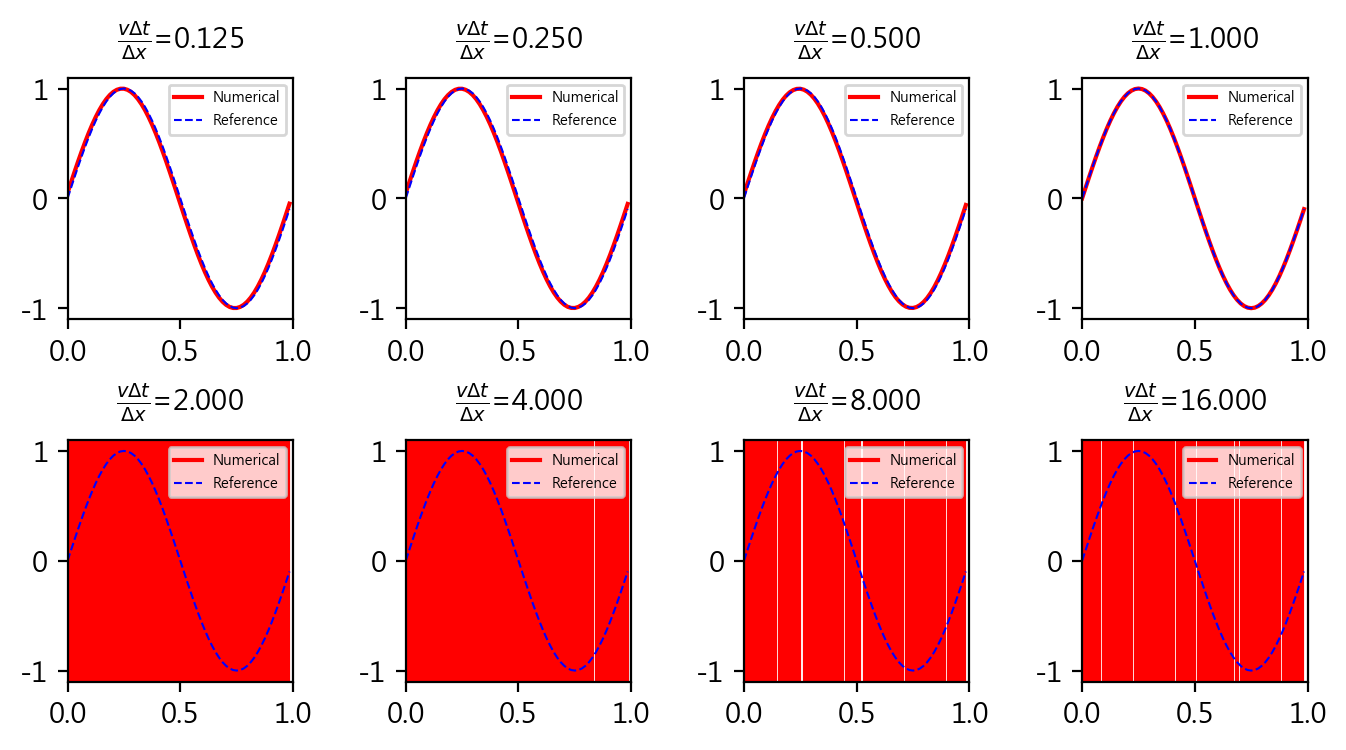

In [4]:
# constants
L   = 1.0   # 1-D computational domain size
N   = 64    # number of computing cells
v   = 1.0   # advection velocity
u0  = 0.0   # background density
amp = 1.0   # sinusoidal amplitude
dx     = L/N            # spatial resolution
period = L/abs(v)       # time period
k = 2.0*np.pi/L
x = np.arange( 0.0, L, dx )            # cell-centered coordinates
end_time = 5.0*period  # simulation time
drawing_resolution = 8           # plotting frequency

cfl_list = np.linspace(-3.0,4.0,8)
cfl_list = 2**cfl_list

plt.figure(figsize=(4*2,2*2), dpi=200)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for index in range(len(cfl_list)):
    cfl = cfl_list[index]
    dt     = cfl*dx/abs(v)  # time interval for data update
    t = 0.0
    u = ref_func_sin_advection( x, t )                   # initial density distribution
    start = time.time() 
    while t<end_time:
        u_in = u.copy()
    #   update all cells
        for i in range( N ):
    #       assuming periodic boundary condition
    #       Lax-Wendroff scheme (conditionally stable)
            im = (i-1+N) % N
            ip = (i+1  ) % N
            u_half_m1 = 0.5*(u_in[im]+u_in[i]) - 0.5*np.sign(v)*cfl*(u_in[i]-u_in[im])
            u_half_p1 = 0.5*(u_in[ip]+u_in[i]) - 0.5*np.sign(v)*cfl*(u_in[ip]-u_in[i])
            u[i] = u_in[i] - np.sign(v)*cfl*(u_half_p1-u_half_m1)

    #   update time and index
        t = t + dt
        #   analytic solution
        u_ref = ref_func_sin_advection( x, t )
        err = np.abs( u_ref - u ).sum()/N
        
    stop = time.time()    
    print("Total calculation time is %.2f s."%(stop-start))
    print("Time is %.4f period; error is %.8f ."%(t/period, err))
    plt.subplot(2,4, index+1)
    plt.plot(x, u, color='r', ls='-', label = 'Numerical')
    plt.plot(x, u_ref, color='b', ls='--', label = 'Reference', lw = 0.75)
    plt.legend(loc='upper right', prop={'size':5.0})
    plt.xlim(0,1.0)
    plt.ylim(-1.1*amp+u0, 1.1*amp+u0)
    plt.title(r'$\frac{v\Delta t}{\Delta x}$=%.3f'%cfl, y=1.05, fontsize=10.0)

## Problem 2

### Unconditional stability of Crank-Nicolson scheme for difussion equation

$\quad$The Crank-Nicolson scheme updates the field $u$ of site $j$ (in unit of $\Delta x$) at time $i+1$ (in unit of $\Delta t$) accroding to:
$$u^{i+1}_{j}=u^{i}_{j}+\frac{D\Delta t}{2\Delta x^2}((u^{i+1}_{j+1}+u^{i+1}_{j-1}-2u^{i+1}_{j})+(u^{i}_{j+1}+u^{i}_{j-1}-2u^{i}_{j}))$$<br>
Using $u^{i+1}_{j\pm1}=e^{\pm ik\Delta x}u^{i+1}_{j\pm1}; u^{i}_{j\pm1}=e^{\pm ik\Delta x}u^{i}_{j\pm1}$ and $r=\left|\frac{2 D\Delta t}{\Delta x^2}\right|$, the stability condition can be deduced easily:
$$(1+\frac{r}{2}(1-cos(k\Delta x)))u^{i+1}_j=(1-\frac{r}{2}(1-cos(k\Delta x)))u^{i}_j\Rightarrow \frac{u^{i+1}_j}{u^i_j}=\frac{1-\frac{r}{2}(1-cos(k\Delta x))}{1+\frac{r}{2}(1-cos(k\Delta x))}=\frac{1-rsin^2(\frac{k\Delta x}{2})}{1+rsin^2(\frac{k\Delta x}{2})}\leqslant 1
$$<br>
We can see the ratio is a real number smaller than 1, suggesting unconditional stability and no phase shift relative to analytic solution. 

### We can test the scheme using different $r$.

Total calculation time is 0.31 s.
Time is 0.1000 (in unit of time_scale); error is 0.00000289 .
Total calculation time is 0.15 s.
Time is 0.1001 (in unit of time_scale); error is 0.00000289 .
Total calculation time is 0.08 s.
Time is 0.1001 (in unit of time_scale); error is 0.00000290 .
Total calculation time is 0.04 s.
Time is 0.1003 (in unit of time_scale); error is 0.00000290 .
Total calculation time is 0.02 s.
Time is 0.1006 (in unit of time_scale); error is 0.00000291 .
Total calculation time is 0.02 s.
Time is 0.1012 (in unit of time_scale); error is 0.00000292 .
Total calculation time is 0.01 s.
Time is 0.1012 (in unit of time_scale); error is 0.00000289 .
Total calculation time is 0.01 s.
Time is 0.1012 (in unit of time_scale); error is 0.00000281 .


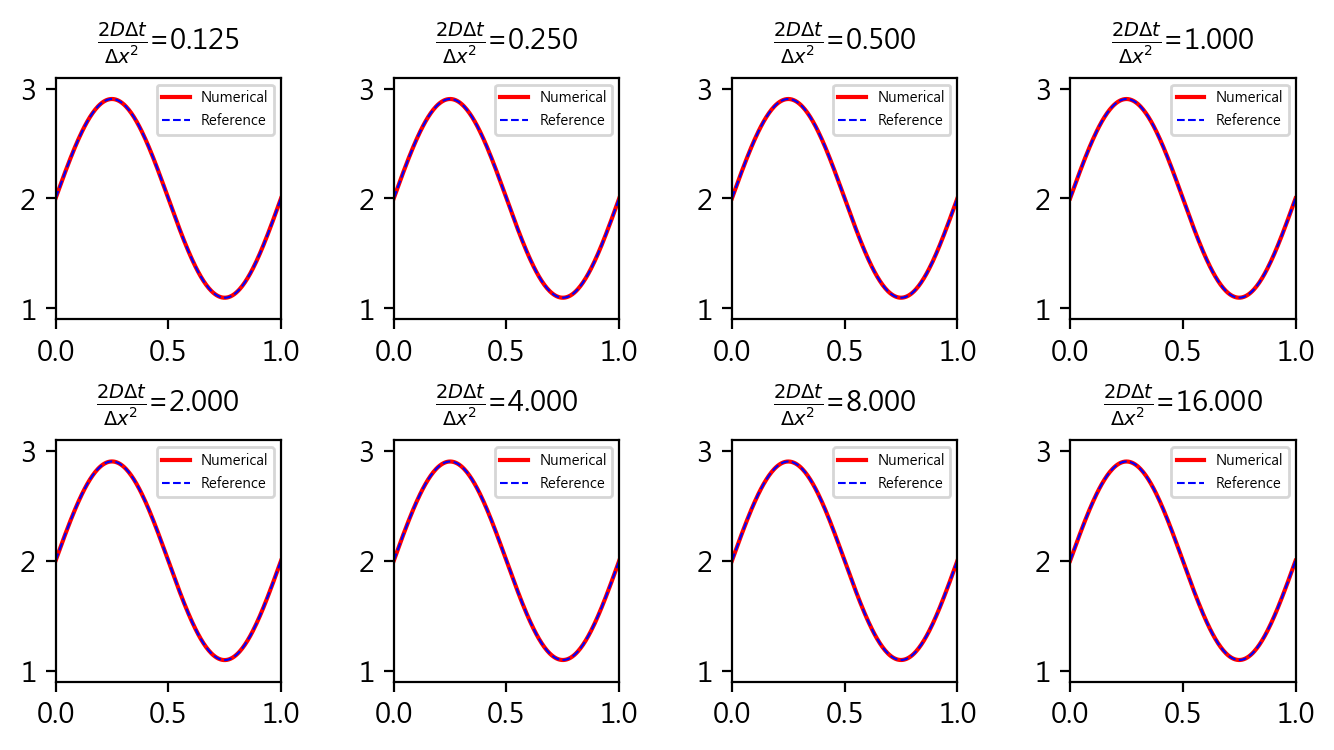

In [17]:
# constants
L   = 1.0   # 1-D computational domain size
N   = 256    # number of computing cells
D   = 0.8   # diffusion constant
u0  = 2.0   # background density
amp = 1.0   # sinusoidal amplitude
N_k = 1
dx     = L/N
drawing_resolution = 8           # plotting frequency
k = N_k*2.*np.pi/L
time_scale = 1/k**2/D    # time scale unit
end_time = 0.1*time_scale        # simulation time
x = np.linspace( 0.0, L, (N+1))            # cell-centered coordinates

cfl_list = np.linspace(-3.0,4.0,8)
cfl_list = 2**cfl_list

plt.figure(figsize=(4*2,2*2), dpi=200)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for index in range(len(cfl_list)):    # 2DΔt/Δx^2
    # derived constants
    # spatial resolution
    cfl = cfl_list[index]
    dt = cfl*dx**2/2./D  # time interval for data update    
    t = 0.0
    u = ref_func_sin_diffusion( x, t )                   # initial density distribution
    # Construct PDE matrix for the solover
    operator = (1.+cfl/2.)*np.eye(N-1)
    operator += cfl/4.*(np.diag(-np.ones(N-2),1) + np.diag(-np.ones(N-2),-1))
    start = time.time()
    operator_inv = np.linalg.inv(operator)
    while t<end_time:
    #   Crank Nicolson scheme
        u_in = u.copy()
        u[1:N] = cfl/4.*(u_in[2:N+1] + u_in[:N-1]) + (1.-cfl/2.)*u_in[1:N]
        b = u[1:N].copy()
        b[0] += cfl/4.*u[0]
        b[-1] += cfl/4.*u[-1]
        #u[1:N] = np.linalg.solve(operator, b)    # Slower: takes 282.50 s for N=256, T_max = 5*time_scale, cfl=0.1
        u[1:N] = operator_inv@b    # Faster: takes 195.16 s for N=256, T_max = 5*time_scale, cfl=0.1
    #   update time
        t += dt
        #   analytic solution
        u_ref = ref_func_sin_diffusion( x, t )
        err = np.abs( u_ref - u ).sum()/N
    stop = time.time()    
    print("Total calculation time is %.2f s."%(stop-start))
    print("Time is %.4f (in unit of time_scale); error is %.8f ."%(t/time_scale, err))
    plt.subplot(2,4, index+1)
    plt.plot(x, u, color='r', ls='-', label = 'Numerical')
    plt.plot(x, u_ref, color='b', ls='--', label = 'Reference', lw = 0.75)
    plt.legend(loc='upper right', prop={'size':5.0})
    plt.xlim(0,1.0)
    plt.ylim(-1.1*amp+u0, 1.1*amp+u0)
    plt.title(r'$\frac{2D\Delta t}{\Delta x^2}$=%.3f'%cfl, y=1.05, fontsize=10.0)
#plt.show()

### We can further compare with FCTS, which is not unconditional stable.

Total calculation time is 1.21 s.
Time is 0.1000 (in unit of time_scale); error is 0.00000181 .
Total calculation time is 0.62 s.
Time is 0.1001 (in unit of time_scale); error is 0.00000072 .
Total calculation time is 0.29 s.
Time is 0.1001 (in unit of time_scale); error is 0.00000145 .
Total calculation time is 0.14 s.
Time is 0.1003 (in unit of time_scale); error is 0.00000580 .
Total calculation time is 0.09 s.
Time is 0.1006 (in unit of time_scale); error is 1084657497361653941520001993173780932077959527784870614614933504.00000000 .
Total calculation time is 0.05 s.
Time is 0.1012 (in unit of time_scale); error is 2681336703395224251090644358852708090591236084857831424.00000000 .
Total calculation time is 0.02 s.
Time is 0.1012 (in unit of time_scale); error is 801837703177316484386328108072960.00000000 .
Total calculation time is 0.01 s.
Time is 0.1012 (in unit of time_scale); error is 809041653817464.25000000 .


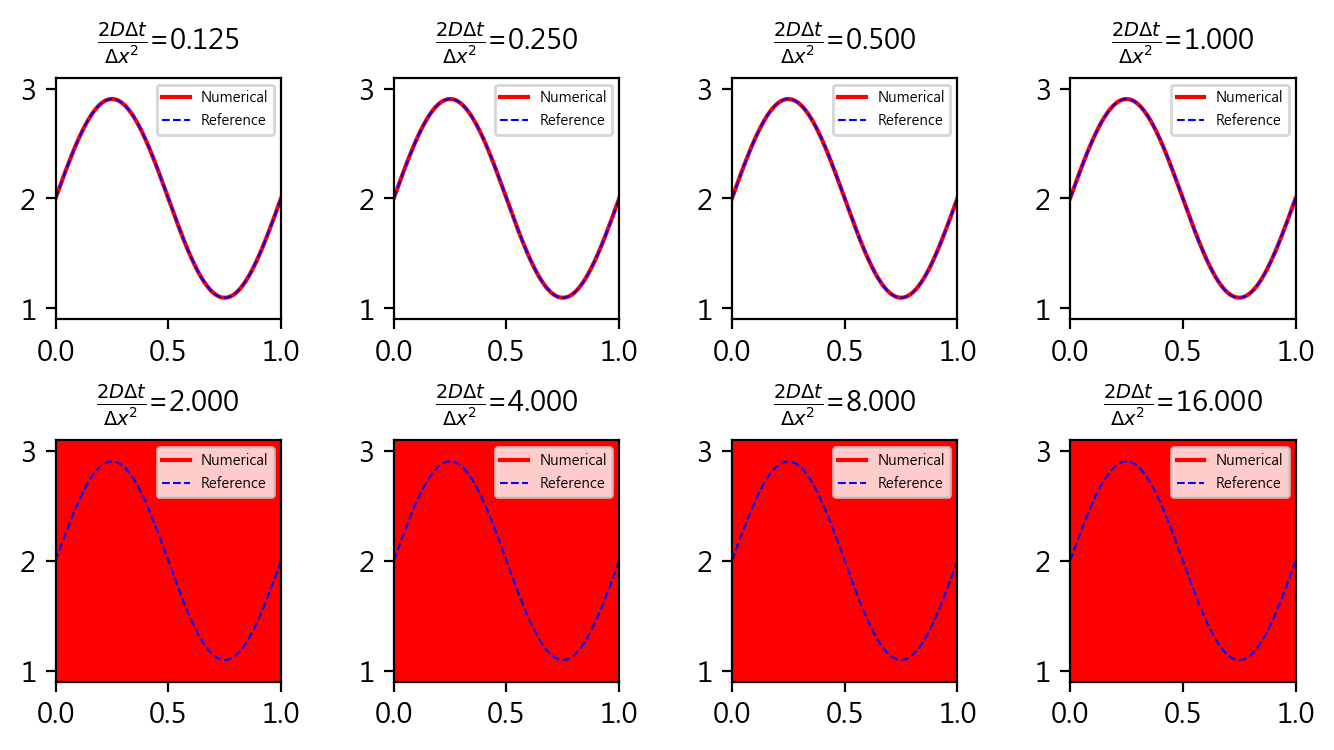

In [18]:
plt.figure(figsize=(4*2,2*2), dpi=200)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for index in range(len(cfl_list)):    # 2DΔt/Δx^2
    cfl = cfl_list[index]
    dt     = cfl*dx**2/2./D  # time interval for data update
    t = 0.0
    u = ref_func_sin_diffusion( x, t )                   # initial density distribution
    start = time.time()
    while t<end_time:
        u_in = u.copy()
    #   update all cells
        for i in range( 1,N ):
    #       assuming periodic boundary condition
            ip = (i+1)
            im = (i-1)
    #       FTCS scheme (conditionally stable)
            u[i] = u_in[i] + cfl/2.*(u_in[ip] + u_in[im] - 2.*u_in[i])
    #   update time and index
        t += dt
        #   analytic solution
        u_ref = ref_func_sin_diffusion( x, t )
        err = np.abs( u_ref - u ).sum()/N
    stop = time.time()    
    print("Total calculation time is %.2f s."%(stop-start))
    print("Time is %.4f (in unit of time_scale); error is %.8f ."%(t/time_scale, err))
    plt.subplot(2,4, index+1)
    plt.plot(x, u, color='r', ls='-', label = 'Numerical')
    plt.plot(x, u_ref, color='b', ls='--', label = 'Reference', lw = 0.75)
    plt.legend(loc='upper right', prop={'size':5.0})
    plt.xlim(0,1.0)
    plt.ylim(-1.1*amp+u0, 1.1*amp+u0)
    plt.title(r'$\frac{2D\Delta t}{\Delta x^2}$=%.3f'%cfl, y=1.05, fontsize=10.0)

$\quad$From the error and phase, one can infer that Crank-Nicolson scheme is correct to $2^{nd}$ order in $\Delta x$, however the phase is always correct since there is no phase shift. The order of error can be referred from the recursion relation: $$\frac{u^{i+1}_j}{u^i_j}=\frac{1-rsin^2(\frac{k\Delta x}{2})}{1+rsin^2(\frac{k\Delta x}{2})}\approx(1-rsin^2(\frac{k\Delta x}{2}))^2+O((k\Delta x)^4)\approx1-2rsin^2(\frac{k\Delta x}{2})+O((k\Delta x)^4)\approx1-2r\frac{k^2\Delta x^2}{4}+O((k\Delta x)^4)$$<br>
Since the analytic solution gives: $$\frac{u^{i+1}_j}{u^i_j}=e^{-Dk^2\Delta t}\approx1-2r\frac{k^2\Delta x^2}{4}+O^{'}((k\Delta x)^4),$$ we expect the error of order 4 for each time step. Because $\Delta t\propto \Delta x^2$, the total error is of order:$$(k\Delta x)^4\centerdot \frac{1}{\Delta x^2}\propto\Delta x^2.$$

![title](./Crank_Nicolson_Error_of_Integration_and_Phase.png)

## Problem 3

### Implement Crank-Nicolson scheme
$\quad$Here we compare the Crank-Nicolson scheme with the FFT filtered (only $k=\frac{2\pi}{L}$ left) solution, as well as the analytic solution. The error of the curve along with the phase shift are evaulated, and the decay rate of amplitude and phase shift are compared with the anayltic prediction shown above. The phase shift is exactly $0$ (or $\pm2\pi$), and $u(x,t)$ decays as expected. No other k-mode except $k=\frac{2\pi}{L}$ emerges due to numerical error, which is indicated by the close fit between numerical simulation and FFT filtered result.<br>
$\quad$We directly calculate the inversion matrix instead of sloving the linear system at every steps, which might have advantage if long time simulation is required.

Total calculation time is 637.66 s.
Time is 5.0000 (in unit of time_scale); error is 0.00000970 ; error with fft is 0.00000000.
Decay ratio is 0.99972908 ; analytic decay ratio is 0.99972908 .
Phase shift is -2.00000000 π relative to reference wave; analytic phase shift is 0.00000000 π.
Error of phase shift is -2.00000000 π.


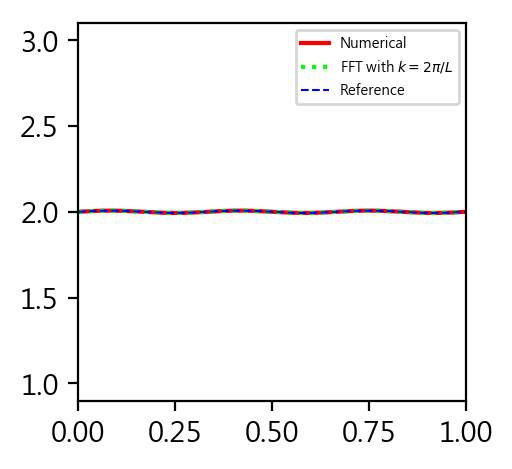

In [12]:
# constants
L   = 1.0   # 1-D computational domain size
N   = 256    # number of computing cells
D   = 0.8   # diffusion constant
u0  = 2.0   # background density
amp = 1.0   # sinusoidal amplitude
cfl = 0.1   # 2DΔt/Δx^2
N_k = 3

# derived constants
dx     = L/N             # spatial resolution
dt     = cfl*dx**2/2./D  # time interval for data update
k = N_k*2.*np.pi/L
time_scale = 1/k**2/D    # time scale unit
ratio_analytic = (1.- cfl*(np.sin(k*dx/2))**2)/(1.+ cfl*(np.sin(k*dx/2))**2)
delta_phase = 0.0    # in unit of π
 
t = 0.0
x = np.linspace( 0.0, L, (N+1))            # cell-centered coordinates
u = ref_func_sin_diffusion( x, t )                   # initial density distribution
ratio = 0.5*N
phase_shift_analytic = 0.0

# plotting parameters
end_time = 5.0*time_scale        # simulation time
drawing_resolution = 8           # plotting frequency
index = 0

# Construct PDE matrix for the solover
operator = (1.+cfl/2.)*np.eye(N-1)
operator += cfl/4.*(np.diag(-np.ones(N-2),1) + np.diag(-np.ones(N-2),-1))

fig = plt.figure( figsize=(2.5,2.5), dpi=200 )
start = time.time()
operator_inv = np.linalg.inv(operator)


while t<end_time:
#   Crank Nicolson scheme
    u_in = u.copy()
    u[1:N] = cfl/4.*(u_in[2:N+1] + u_in[:N-1]) + (1.-cfl/2.)*u_in[1:N]
    
    b = u[1:N].copy()
    b[0] += cfl/4.*u[0]
    b[-1] += cfl/4.*u[-1]
    #u[1:N] = np.linalg.solve(operator, b)    # Slower: takes 282.50 s for N=256, T_max = 5*time_scale, cfl=0.1
    u[1:N] = operator_inv@b    # Faster: takes 195.16 s for N=256, T_max = 5*time_scale, cfl=0.1
        
#   update time and index
    t += dt
    index += 1
    #   analytic solution
    u_ref = ref_func_sin_diffusion( x, t )
    err = np.abs( u_ref - u ).sum()/N
    
#   do fft
    temp = np.fft.rfft(u[:N])
    u_fft = np.zeros_like(temp)
    u_fft[0] = temp[0]
    u_fft[N_k] = temp[N_k]
    u_fft = np.fft.irfft(u_fft)
    ratio = abs(temp[N_k])/ratio
    err_fft = np.abs( u_fft - u[:N] ).sum()/N
    
#   calculate phase shift
    phase_shift = temp[N_k]/abs(temp[N_k])/np.exp(complex(0, -0.5*np.pi))
    if np.real(phase_shift)<0:
        phase_shift = np.arctan(np.imag(phase_shift)/np.real(phase_shift))
        phase_shift -= np.sign(phase_shift)*np.pi
    else:
        phase_shift = np.arctan(np.imag(phase_shift)/np.real(phase_shift))
    if phase_shift>0:
        phase_shift -= 2.0*np.pi
    phase_shift /= np.pi
    phase_shift_analytic += delta_phase

    if index%drawing_resolution == 0:
        display.clear_output(wait=True)
        plt.clf()
        plt.plot(x, u, color='r', ls='-', label = 'Numerical')
        plt.plot(x[:N], u_fft[:N], color='lime', ls=':', label = 'FFT with $k=2π/L$')
        plt.plot(x, u_ref, color='b', ls='--', label = 'Reference', lw = 0.75)
        plt.legend(loc='upper right', prop={'size':5.0})
        plt.xlim(0,1.0)
        plt.ylim(-1.1*amp+u0, 1.1*amp+u0)
        display.display(plt.gcf())
        print("Time is %.4f (in unit of time_scale); error is %.8f ; error with fft is %.8f."%(t/time_scale, err, err_fft))
        print("Decay ratio is %.8f ; analytic decay ratio is %.8f ."%(ratio, ratio_analytic) )
        print("Phase shift is %.8f π relative to reference wave; analytic phase shift is %.8f π.\nError of phase shift is %.8f π." \
          %(phase_shift, phase_shift_analytic, phase_shift-phase_shift_analytic) )
        
#   renew the ratio
    ratio_temp = ratio
    ratio = abs(temp[N_k])    # use this for no normalization
stop = time.time()    
display.clear_output(wait=True)

print("Total calculation time is %.2f s."%(stop-start))
print("Time is %.4f (in unit of time_scale); error is %.8f ; error with fft is %.8f."%(t/time_scale, err, err_fft))
print("Decay ratio is %.8f ; analytic decay ratio is %.8f ."%(ratio_temp, ratio_analytic) )
print("Phase shift is %.8f π relative to reference wave; analytic phase shift is %.8f π.\nError of phase shift is %.8f π." \
       %(phase_shift, phase_shift_analytic, phase_shift-phase_shift_analytic) )